In [1]:
import joblib
import pandas as pd
from quadratic_weighted_kappa import quadratic_weighted_kappa
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
scores = pd.read_csv('../training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
y =  joblib.load('score_asap1')
model_score = joblib.load('score_model_normalized')

In [3]:
scores = scores[scores['essay_set'] == 1]
scores = scores[['rater1_domain1', 'rater2_domain1', 'rater3_domain1']]
len(scores)

1783

In [4]:
scores

,rater1_domain1,rater2_domain1,rater3_domain1
0,4,4,NaN
1,5,4,NaN
2,4,3,NaN
3,5,5,NaN
4,4,4,NaN
...,...,...,...
1778,4,4,NaN
1779,3,4,NaN
1780,4,4,NaN
1781,1,1,NaN


### Check how many rater3 involved (measuring disagreement between rater 1 and rater 2)

In [5]:
scores.count()

rater1_domain1    1783
rater2_domain1    1783
rater3_domain1       0
dtype: int64

In [6]:
scores = scores[['rater1_domain1', 'rater2_domain1']]
scores['model_score'] = model_score
scores['y'] = y

In [7]:
scores

,rater1_domain1,rater2_domain1,model_score,y
0,4,4,9.0,8
1,5,4,9.0,9
2,4,3,8.0,7
3,5,5,11.0,10
4,4,4,9.0,8
...,...,...,...,...
1778,4,4,9.0,8
1779,3,4,7.0,7
1780,4,4,7.0,8
1781,1,1,3.0,2


In [8]:
quadratic_weighted_kappa(y, model_score)

0.7840315328830542

In [9]:
pearsonr(y, model_score)

(0.7992312605787377, 0.0)

In [10]:
quadratic_weighted_kappa(scores['rater1_domain1'], scores['rater2_domain1'])

0.7209530281501617

In [11]:
pearsonr(scores['rater1_domain1'], scores['rater2_domain1'])

(0.7213267131944937, 2.0505357758788733e-286)

In [12]:
rater1_score = scores['rater1_domain1']
rater2_score = scores['rater2_domain1']

In [13]:
print(y)

0        8
1        9
2        7
3       10
4        8
        ..
1778     8
1779     7
1780     8
1781     2
1782     7
Name: domain1_score, Length: 1783, dtype: int64


In [14]:
#scores.to_excel('asap6_summary.xlsx')

In [15]:
discrepancy_r1r2 = rater1_score == rater2_score
type(discrepancy_r1r2)

pandas.core.series.Series

In [16]:
diff = rater1_score - rater2_score
diff_abs = list(map(abs, diff))
diff

0       0
1       1
2       1
3       0
4       0
       ..
1778    0
1779   -1
1780    0
1781    0
1782    1
Length: 1783, dtype: int64

In [17]:
diff_abs[-5:]

[0, 1, 0, 0, 1]

In [18]:
scores['diff_r1r2'] = diff_abs
scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2
0,4,4,9.0,8,0
1,5,4,9.0,9,1
2,4,3,8.0,7,1
3,5,5,11.0,10,0
4,4,4,9.0,8,0
...,...,...,...,...,...
1778,4,4,9.0,8,0
1779,3,4,7.0,7,1
1780,4,4,7.0,8,0
1781,1,1,3.0,2,0


In [19]:
diff_y_model = model_score - y
diff_y_model_abs = list(map(abs, diff_y_model))
diff_y_model

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1778    1.0
1779    0.0
1780   -1.0
1781    1.0
1782    0.0
Name: domain1_score, Length: 1783, dtype: float64

In [20]:
diff_y_model_abs = list(map(int, diff_y_model_abs))
diff_y_model_abs[-3:]

[1, 1, 0]

In [21]:
scores['diff_model_y'] = diff_y_model_abs
scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
0,4,4,9.0,8,0,1
1,5,4,9.0,9,1,0
2,4,3,8.0,7,1,1
3,5,5,11.0,10,0,1
4,4,4,9.0,8,0,1
...,...,...,...,...,...,...
1778,4,4,9.0,8,0,1
1779,3,4,7.0,7,1,0
1780,4,4,7.0,8,0,1
1781,1,1,3.0,2,0,1


In [22]:
scores.to_excel('asap1_summary.xlsx')

In [23]:
diff_r1r2 = list(scores['diff_r1r2'])
diff_model_y = list(scores['diff_model_y'])

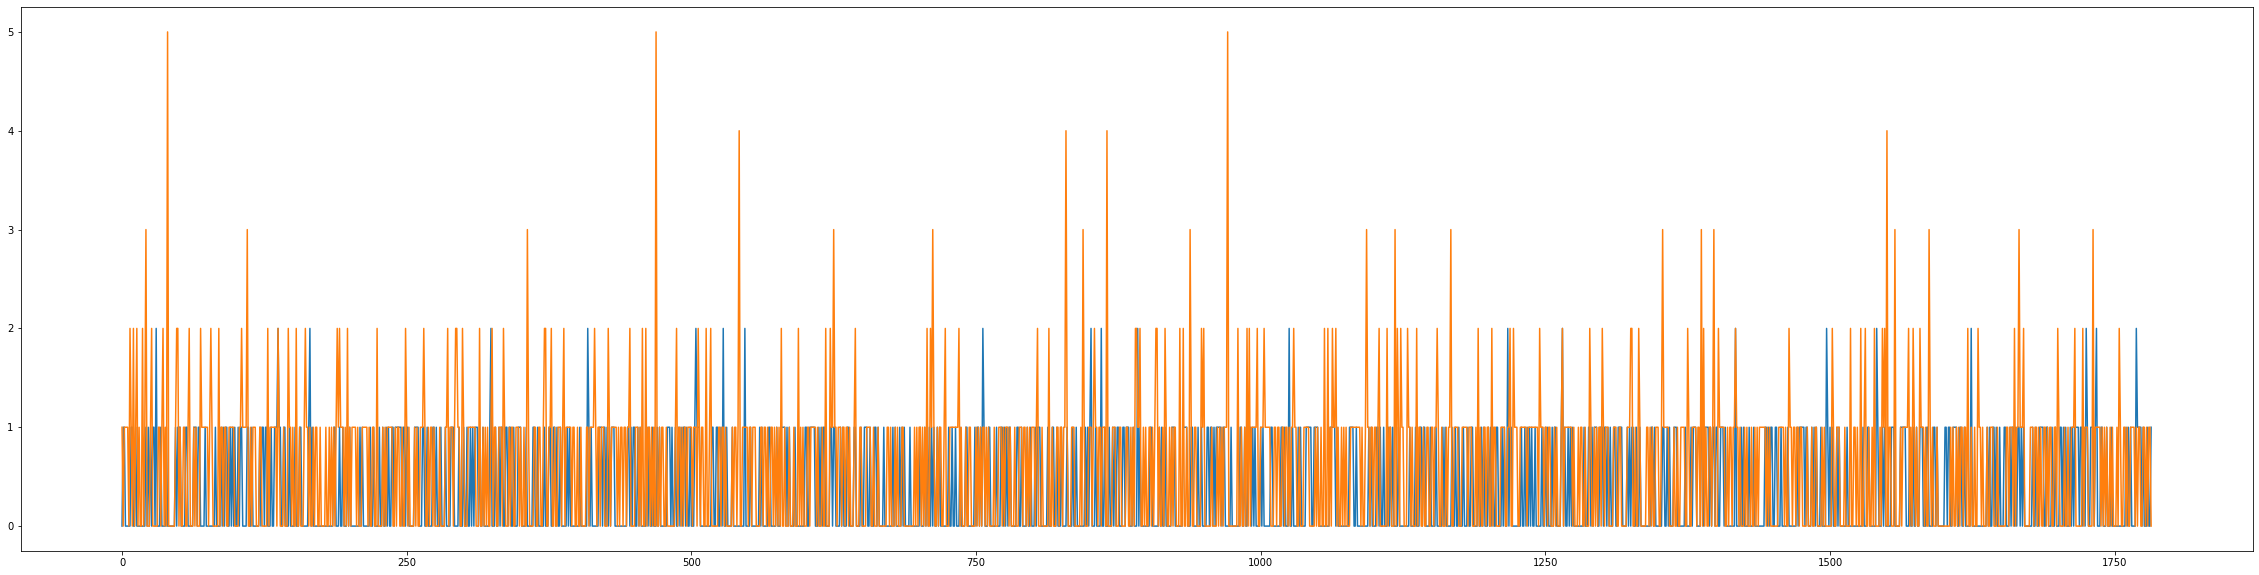

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,10))
plt.plot(diff_r1r2)
plt.plot(diff_model_y)
plt.show()

In [25]:
diff = np.array(diff_r1r2) - np.array(diff_model_y)
diff_abs = list(map(abs,diff))
diff

array([-1,  1,  0, ..., -1, -1,  1])

In [26]:
diff_abs[-3:]

[1, 1, 1]

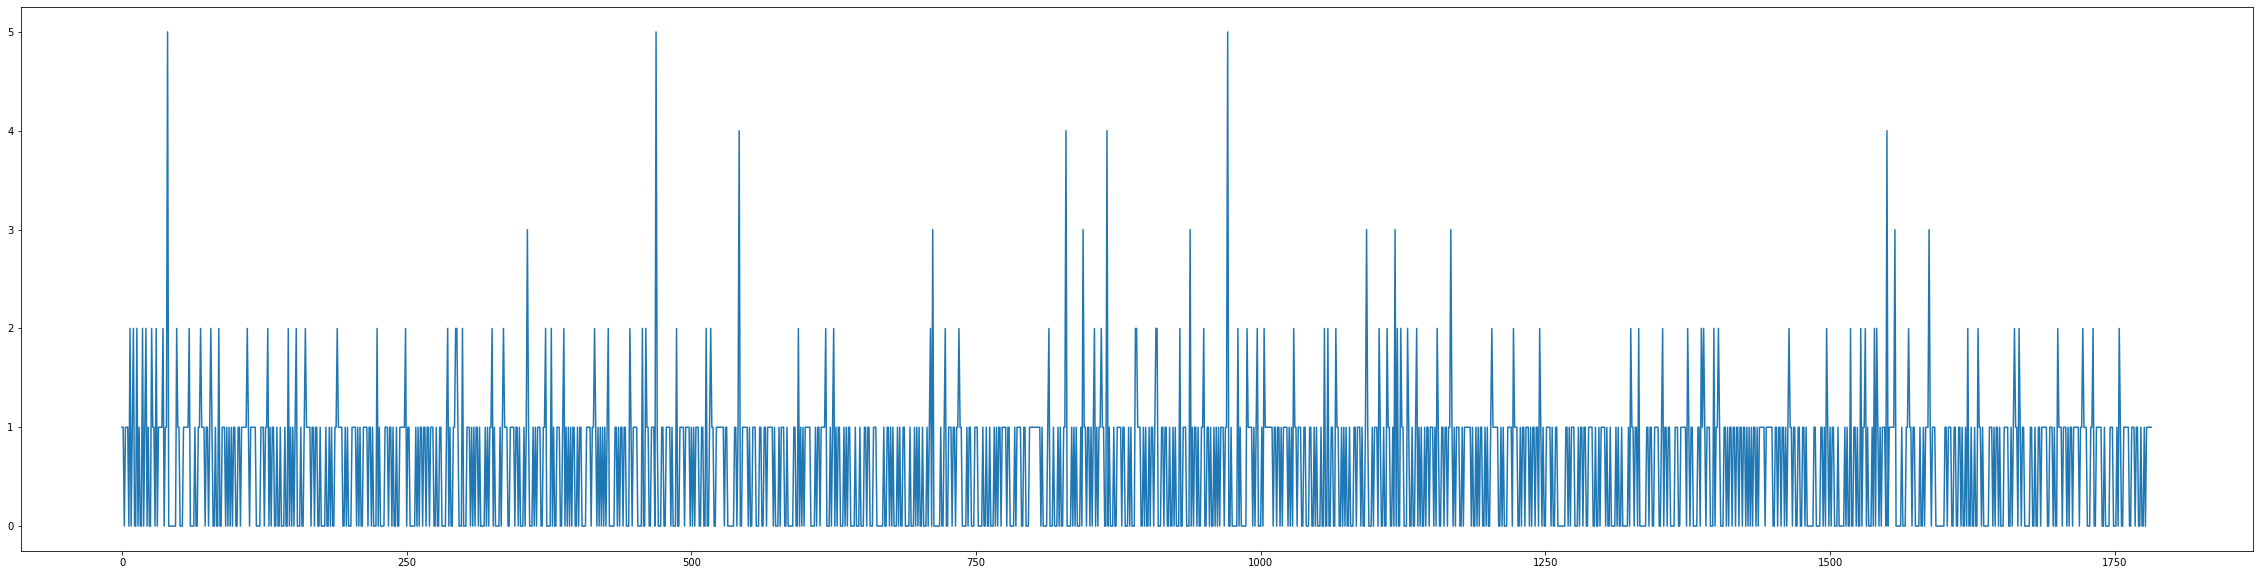

In [27]:
plt.figure(figsize=(40,10))
plt.plot(diff_abs)
plt.show()

In [28]:
from collections import Counter
Counter(diff_abs)

Counter({1: 836, 0: 836, 2: 95, 5: 3, 3: 9, 4: 4})

In [29]:
bad_scores = scores[scores['diff_model_y'] != 0]
good_scores = scores[scores['diff_model_y'] == 0]

In [30]:
bad_scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
0,4,4,9.0,8,0,1
2,4,3,8.0,7,1,1
3,5,5,11.0,10,0,1
4,4,4,9.0,8,0,1
5,4,4,7.0,8,0,1
...,...,...,...,...,...,...
1775,5,4,10.0,9,1,1
1776,5,5,9.0,10,0,1
1778,4,4,9.0,8,0,1
1780,4,4,7.0,8,0,1


In [31]:
Counter(bad_scores['diff_r1r2'])

Counter({0: 591, 1: 298, 2: 18})

In [32]:
good_scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
1,5,4,9.0,9,1,0
6,5,5,10.0,10,0,0
9,5,4,9.0,9,1,0
11,4,4,8.0,8,0,0
14,3,3,6.0,6,0,0
...,...,...,...,...,...,...
1773,3,2,5.0,5,1,0
1774,5,5,10.0,10,0,0
1777,4,4,8.0,8,0,0
1779,3,4,7.0,7,1,0


In [33]:
Counter(good_scores['diff_r1r2'])

Counter({1: 298, 0: 574, 2: 4})

## Passing, Borderline, Failing
#### 2-6 failing
#### 7 bordeline
#### 8-12 passing

In [15]:
Counter(rater1_score)

Counter({4: 922, 5: 507, 3: 196, 6: 120, 2: 28, 1: 10})

In [28]:
r1 = dict(Counter(rater1_score))

rater1_score_passing = r1[5] + r1[6]
rater1_score_borderline = r1[3] + r1[4]
rater1_score_failing = r1[1] + r1[2]

total = rater1_score_passing + rater1_score_borderline + rater1_score_failing
total

1783

In [29]:
Counter(rater2_score)

Counter({4: 937, 3: 178, 5: 530, 6: 103, 2: 24, 1: 11})

In [30]:
r2 = dict(Counter(rater2_score))

rater2_score_passing = r2[5] + r2[6]
rater2_score_borderline = r2[3] + r2[4]
rater2_score_failing = r2[1] + r2[2]

total = rater2_score_passing + rater2_score_borderline + rater2_score_failing
total

1783

In [31]:
Counter(model_score)

Counter({9.0: 504,
         8.0: 573,
         11.0: 109,
         7.0: 216,
         10.0: 280,
         6.0: 80,
         5.0: 18,
         4.0: 1,
         12.0: 1,
         3.0: 1})

In [32]:
m = dict(Counter(model_score))

model_score_passing = m[9] + m[10] + m[11] + m[12]
model_score_borderline = m[6] + m[7] + m[8]
model_score_failing = m[3] + m[4] + m[5]

total = model_score_passing + model_score_borderline + model_score_failing
total

1783

In [33]:
print("Passing")
print("rater1_score: ", rater1_score_passing)
print("rater2_score: ", rater2_score_passing)
print("model_score: ", model_score_passing)

Passing
rater1_score:  627
rater2_score:  633
model_score:  894


In [34]:
print("Borderline")
print("rater1_score: ", rater1_score_borderline)
print("rater2_score: ", rater2_score_borderline)
print("model_score: ", model_score_borderline)

Borderline
rater1_score:  1118
rater2_score:  1115
model_score:  869


In [35]:
print("Failing")
print("rater1_score: ", rater1_score_failing)
print("rater2_score: ", rater2_score_failing)
print("model_score: ", model_score_failing)

Failing
rater1_score:  38
rater2_score:  35
model_score:  20


## Quantitative Assessment of AES Model

## z must be lower than 0.15

In [16]:
human1_score = np.array(rater1_score)
human2_score = np.array(rater2_score)

In [35]:
human2_score

array([4, 4, 3, ..., 4, 1, 3], dtype=int64)

In [36]:
model_mean = np.mean(model_score)
print(model_mean)
y_mean = np.mean(y)
print(y_mean)
mean_diff = abs(model_mean-y_mean)
print(mean_diff)

8.536174985978688
8.528323051037576
0.007851934941111693


In [37]:
model_variance = np.var(model_score)
print(model_variance)
y_variance = np.var(y)
print(y_variance)

1.5969807702772711
2.365855123904993


In [38]:
z = mean_diff / np.sqrt((model_variance + y_variance)/2)
z

0.005578130191368577

## Statistics

### mean

In [17]:
print("Mean Human-1 score: ", np.mean(human1_score))
print("Mean Human-2 score: ", np.mean(human2_score))
print("Mean model score: ", np.mean(model_score))
print("Mean label: ", np.mean(y))

Mean Human-1 score:  4.260796410544027
Mean Human-2 score:  4.26752664049355
Mean model score:  8.536174985978688
Mean label:  8.528323051037576


### Standard Deviation

In [50]:
print("SD Human-1 score: ", np.std(human1_score))
print("SD Human-2 score: ", np.std(human2_score))
print("SD model score: ", np.std(model_score))
print("SD label: ", np.std(y))

SD Human-1 score:  0.8418823783174797
SD Human-2 score:  0.8160579198775214
SD model score:  1.2637170451795257
SD label:  1.5381336495587739


### summary

In [51]:
scores.describe()

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
count,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000
mean,4.260796,4.267527,8.536175,8.528323,0.358946,0.606842
std,0.842119,0.816287,1.264072,1.538565,0.504900,0.698482
min,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000
25%,4.000000,4.000000,8.000000,8.000000,0.000000,0.000000
50%,4.000000,4.000000,9.000000,8.000000,0.000000,1.000000
75%,5.000000,5.000000,9.000000,10.000000,1.000000,1.000000
max,6.000000,6.000000,12.000000,12.000000,2.000000,5.000000


### ANOVA test

In [52]:
# Test if data have the same means
from scipy.stats import f_oneway
f_oneway(human1_score, human2_score)

F_onewayResult(statistic=0.058715717245270804, pvalue=0.8085513801168893)

### t test

In [53]:
from scipy.stats import ttest_ind, ttest_rel
ttest_ind(human1_score, model_score)

Ttest_indResult(statistic=-118.85641526536598, pvalue=0.0)

### normality test

In [54]:
from scipy.stats import normaltest
normaltest(human1_score)

NormaltestResult(statistic=52.9965426627354, pvalue=3.1041806029264694e-12)

In [55]:
from scipy.stats import shapiro
shapiro(human1_score)

(0.8612709641456604, 4.8388634119325355e-37)

### skewness

In [56]:
from scipy.stats import skew
skew(human1_score)

-0.2287364099813648

In [57]:
from scipy.stats import kurtosis
kurtosis(human1_score)

1.03142696663852

### Levene (equality of variance)

In [58]:
from scipy.stats import levene
levene(model_score, y)

LeveneResult(statistic=9.639752604591456, pvalue=0.0019190576577154301)

### Kruskall-Wallis (test if median of all groups are equal)

In [59]:
from scipy.stats import kruskal
kruskal(human1_score, human2_score, model_score)

KruskalResult(statistic=3697.619825564321, pvalue=0.0)

In [60]:
a = np.sort(human1_score)
a

array([1, 1, 1, ..., 6, 6, 6], dtype=int64)

In [61]:
from collections import Counter
Counter(a)

Counter({1: 10, 2: 28, 3: 196, 4: 922, 5: 507, 6: 120})

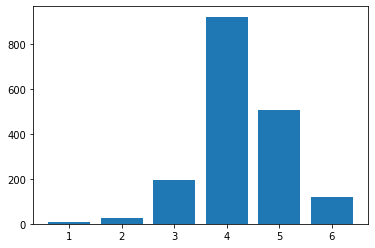

In [62]:
plt.bar(*zip(*dict(Counter(human1_score)).items()))
plt.show()

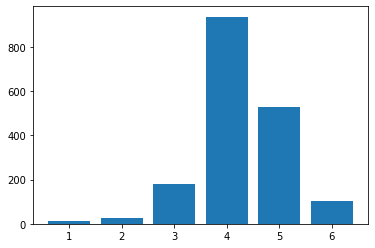

In [63]:
plt.bar(*zip(*dict(Counter(human2_score)).items()))
plt.show()

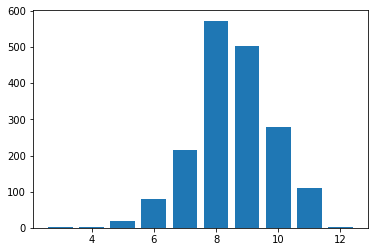

In [64]:
plt.bar(*zip(*dict(Counter(model_score)).items()))
plt.show()

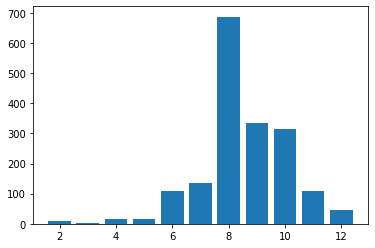

In [65]:
plt.bar(*zip(*dict(Counter(y)).items()))
plt.show()

c:\users\20167947\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


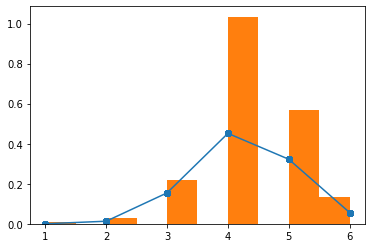

In [66]:
import pylab as pl
import scipy.stats as stats

fit = stats.norm.pdf(a, np.mean(a), np.std(a))  #this is a fitting indeed

pl.plot(a,fit,'-o')

pl.hist(a,normed=True)      #use this to draw histogram of your data

pl.show() 

## Studying model behaviour

### 1. Answer Length

In [18]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap1')
answer_length = x[:,0]

In [19]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(answer_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Answer Length)' % corr)

Pearson's correlation Human-1 : 0.639  (Answer Length)
Pearson's correlation Human-2 : 0.658  (Answer Length)
Pearson's correlation Model : 0.827  (Answer Length)


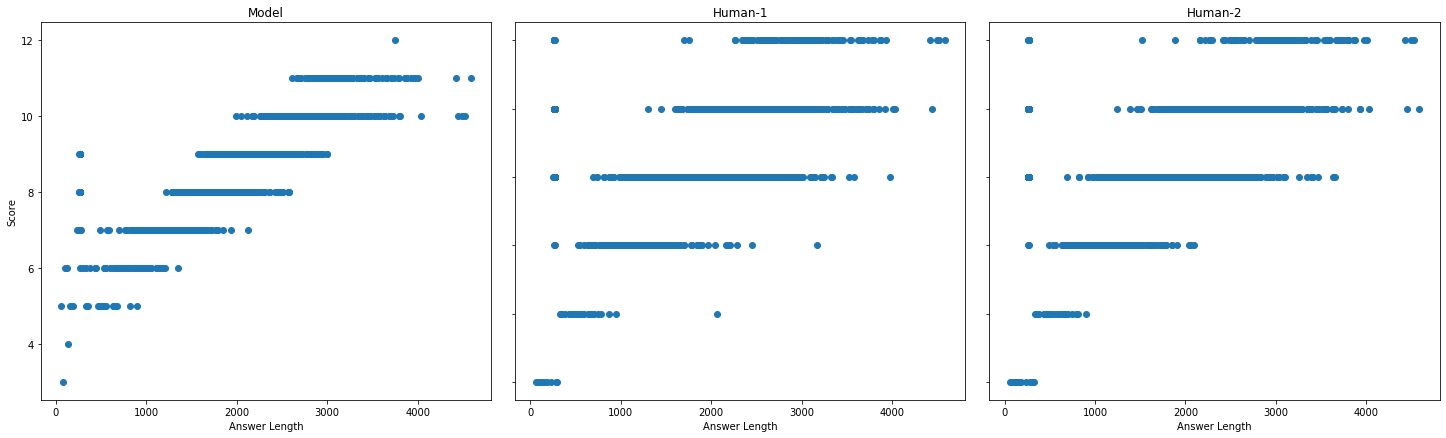

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(answer_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(answer_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(answer_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Answer Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('answer_length.png', bbox_inches="tight")

### 2. Word Counts

In [21]:
word_count = x[:,1]

In [22]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(word_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Word Count)' % corr)

Pearson's correlation Human-1 : 0.624  (Word Count)
Pearson's correlation Human-2 : 0.644  (Word Count)
Pearson's correlation Model : 0.810  (Word Count)


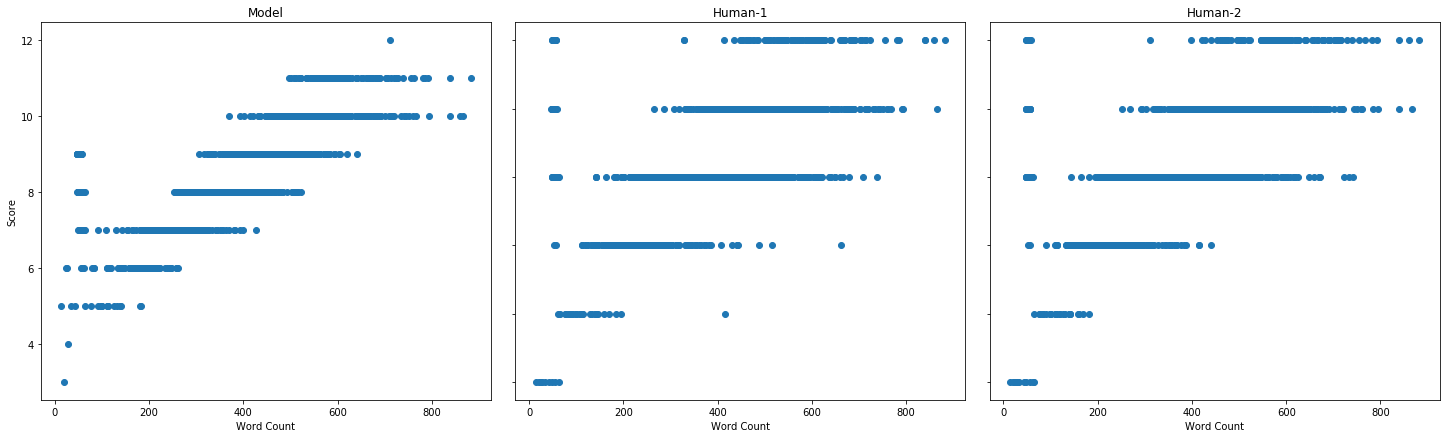

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(word_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(word_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(word_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Word Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('word_count.png', bbox_inches="tight")

### 3. Average Word Length

In [25]:
avg_word_length = x[:,2]

In [26]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(avg_word_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Average Word Length)' % corr)

Pearson's correlation Human-1 : 0.390  (Average Word Length)
Pearson's correlation Human-2 : 0.376  (Average Word Length)
Pearson's correlation Model : 0.431  (Average Word Length)


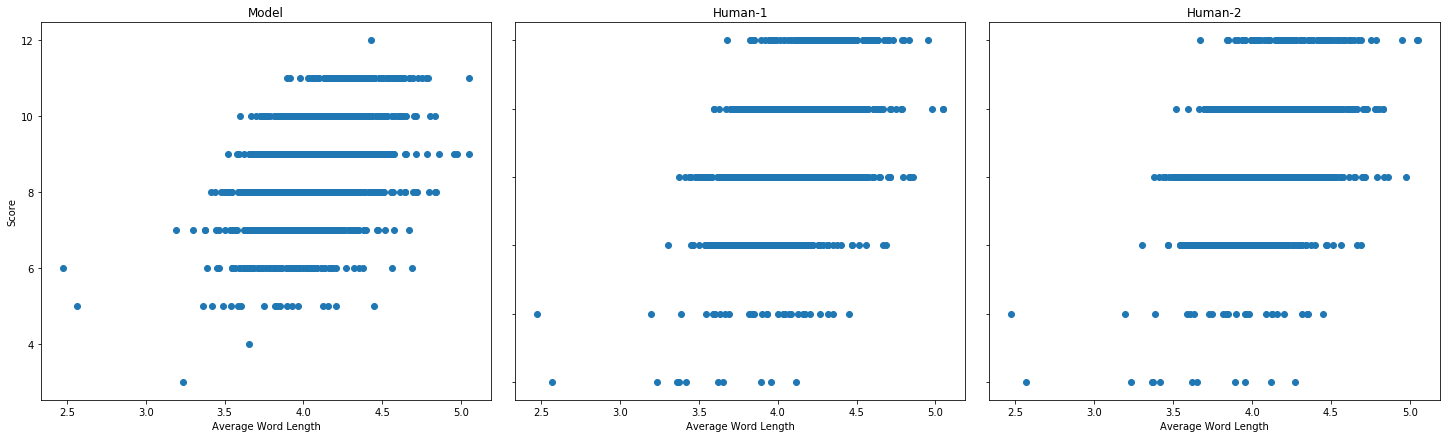

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(avg_word_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(avg_word_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(avg_word_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Average Word Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('avg_word_length.png', bbox_inches="tight")

### 4. Good n-gram

In [27]:
good_ngram = x[:,3]

In [28]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(good_ngram, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, model_score)
print('Pearson\'s correlation Model : %.3f  (Good n-gram)' % corr)

Pearson's correlation Human-1 : 0.625  (Good n-gram)
Pearson's correlation Human-2 : 0.645  (Good n-gram)
Pearson's correlation Model : 0.811  (Good n-gram)


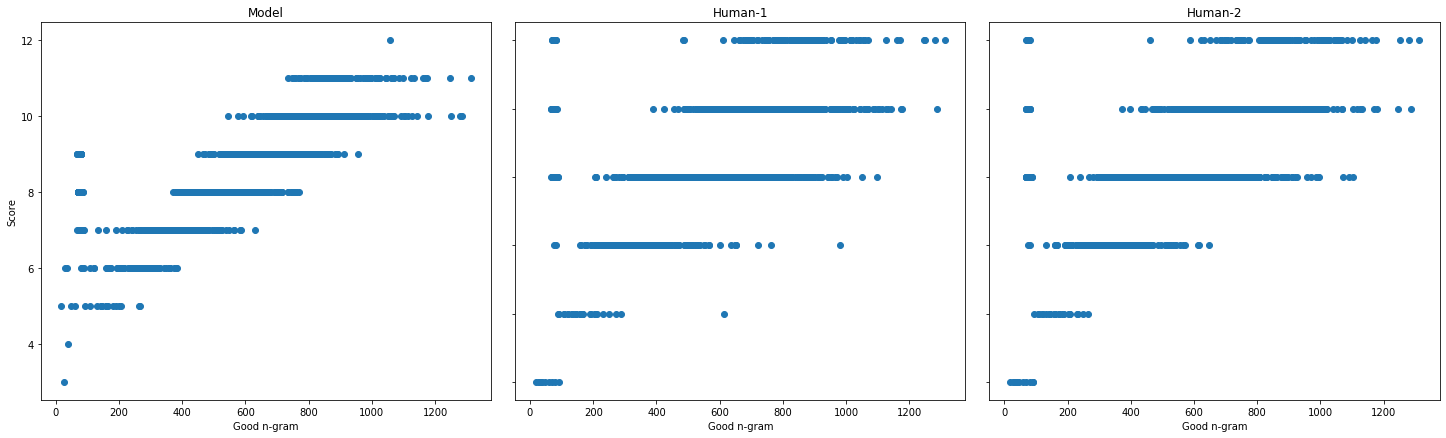

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(good_ngram, model_score)
axs[0].set_title('Model')
axs[1].scatter(good_ngram, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(good_ngram, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Good n-gram', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('good_ngram.png', bbox_inches="tight")

### 5. Prompt Overlap

In [29]:
prompt_overlap = x[:,4]

Pearson's correlation Human-1 : 0.589  (Prompt Overlap)
Pearson's correlation Human-2 : 0.606  (Prompt Overlap)
Pearson's correlation Model : 0.760  (Prompt Overlap)


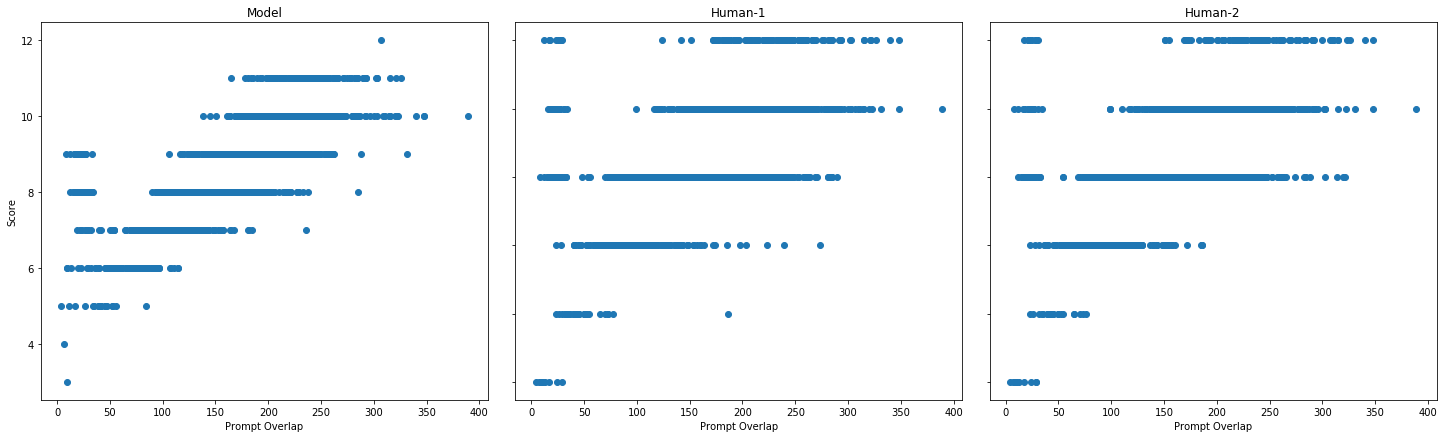

In [30]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap.png', bbox_inches="tight")

### 6. Prompt Overlap (synonym)

In [31]:
prompt_overlap_syn = x[:,5]

Pearson's correlation Human-1 : 0.521  (Prompt Overlap Synonym)
Pearson's correlation Human-2 : 0.537  (Prompt Overlap Synonym)
Pearson's correlation Model : 0.678  (Prompt Overlap Synonym)


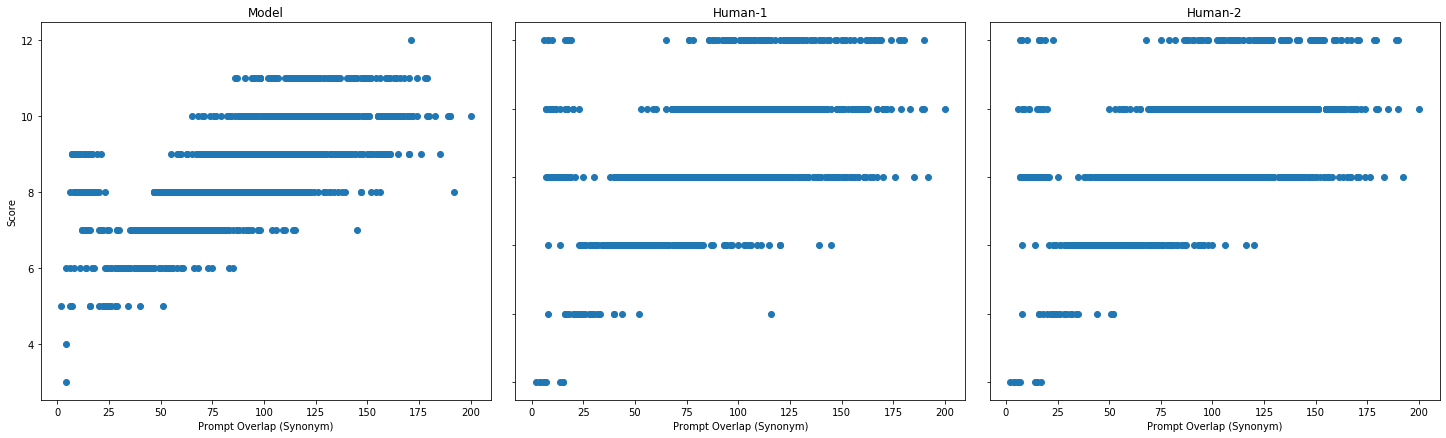

In [32]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap_syn, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap Synonym)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap_syn, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap_syn, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap_syn, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap (Synonym)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap_syn.png', bbox_inches="tight")

### 7. Punctuation Counts

In [33]:
punc_count = x[:,6]

Pearson's correlation Human-1 : 0.597  (Punctuation Count)
Pearson's correlation Human-2 : 0.610  (Punctuation Count)
Pearson's correlation Model : 0.769  (Punctuation Count)


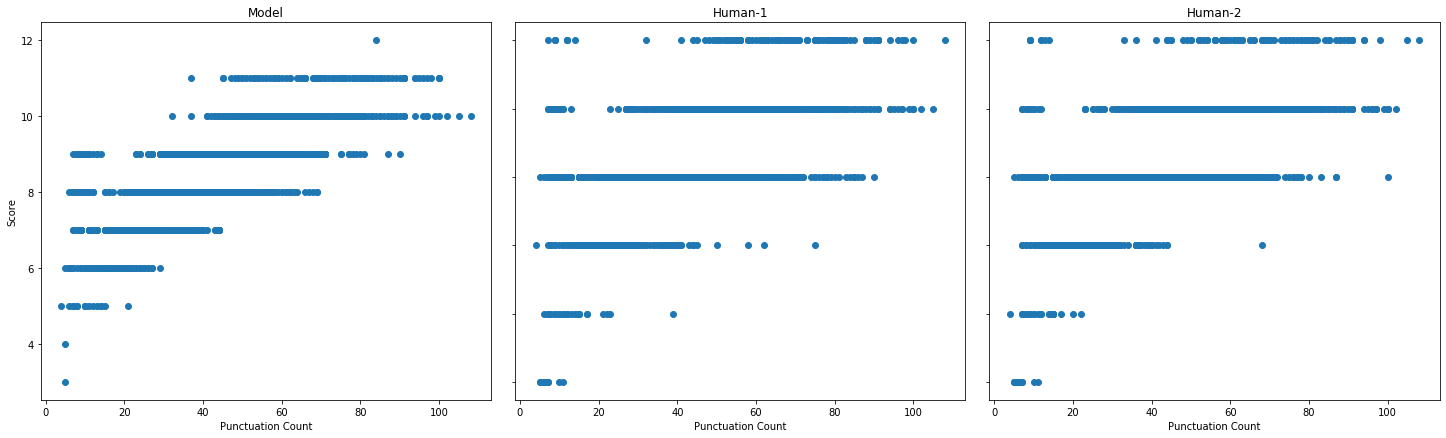

In [34]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(punc_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Punctuation Count)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(punc_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(punc_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(punc_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Punctuation Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('punc_count.png', bbox_inches="tight")

### 8. Spelling Error

In [35]:
spelling_error = x[:,7]

In [36]:
spelling_error

array([0.03061224, 0.04347826, 0.00967742, ..., 0.02821317, 0.05      ,
       0.04471545])

Pearson's correlation Human-1 : -0.261  (Spelling Error)
Pearson's correlation Human-2 : -0.261  (Spelling Error)
Pearson's correlation Model : -0.304  (Spelling Error)


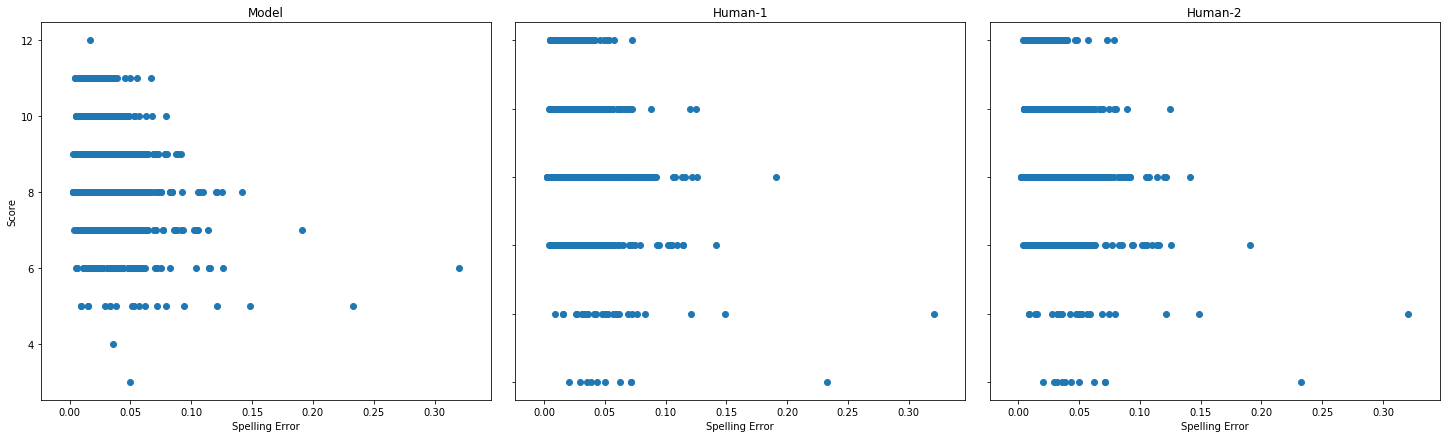

In [37]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(spelling_error, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, model_score)
print('Pearson\'s correlation Model : %.3f  (Spelling Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(spelling_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(spelling_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(spelling_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Spelling Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('spelling_error.png', bbox_inches="tight")

### 9. Unique Words

In [38]:
unique_words = x[:,8]
unique_words

array([154., 177., 145., ...,  95.,  14., 109.])

Pearson's correlation Human-1 : 0.642  (Unique Words)
Pearson's correlation Human-2 : 0.667  (Unique Words)
Pearson's correlation Model : 0.827  (Unique Words)


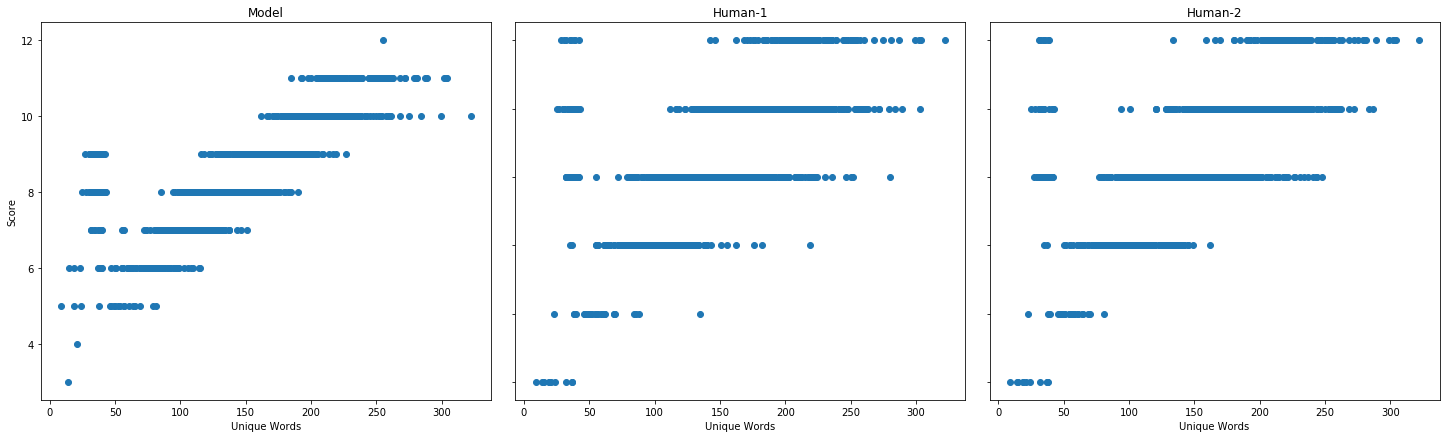

In [39]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(unique_words, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, model_score)
print('Pearson\'s correlation Model : %.3f  (Unique Words)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(unique_words, model_score)
axs[0].set_title('Model')
axs[1].scatter(unique_words, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(unique_words, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Unique Words', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('unique_words.png', bbox_inches="tight")

### 10. Prompt Similarity (SBert)

In [40]:
sbert_similarity = x[:,9]
sbert_similarity

array([0.81765854, 0.85580134, 0.88850552, ..., 0.87643838, 0.67889535,
       0.80236501])

Pearson's correlation Human-1: 0.147 (Prompt Similarity (SBert))
Pearson's correlation Human-2: 0.142 (Prompt Similarity (SBert))
Pearson's correlation Model: 0.168 (Prompt Similarity (SBert))


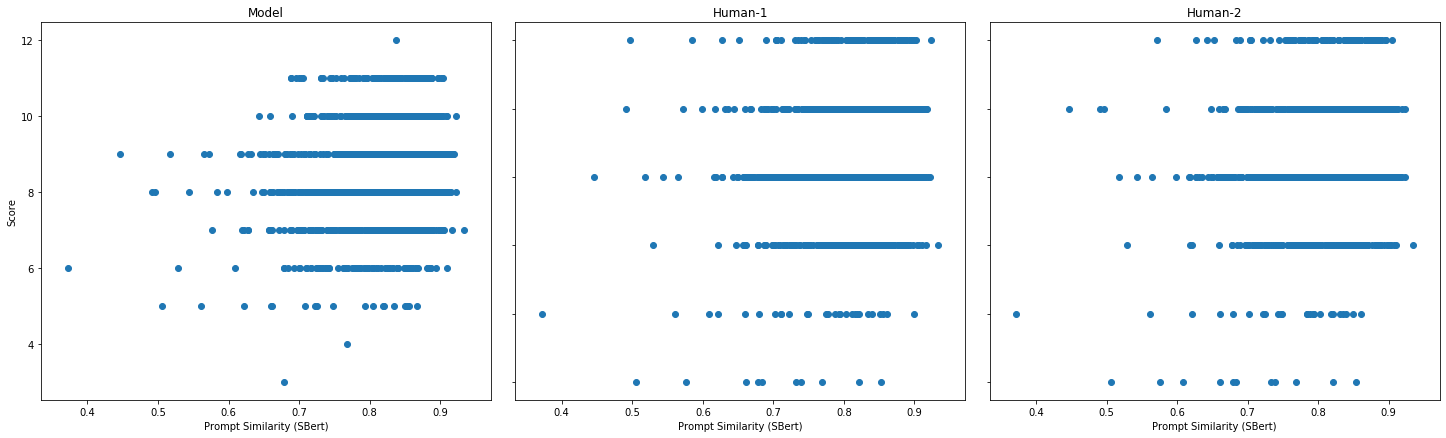

In [41]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(sbert_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (SBert))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(sbert_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(sbert_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(sbert_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (SBert)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('sbert_similarity.png', bbox_inches="tight")

### 11. Prompt Similarity (BOW)

In [42]:
bow_similarity = x[:,10]
bow_similarity

array([0.56599141, 0.50290705, 0.52658035, ..., 0.57204218, 0.26891706,
       0.28310754])

Pearson's correlation Human-1: 0.178 (Prompt Similarity (BOW))
Pearson's correlation Human-2: 0.183 (Prompt Similarity (BOW))
Pearson's correlation Model: 0.202 (Prompt Similarity (BOW))


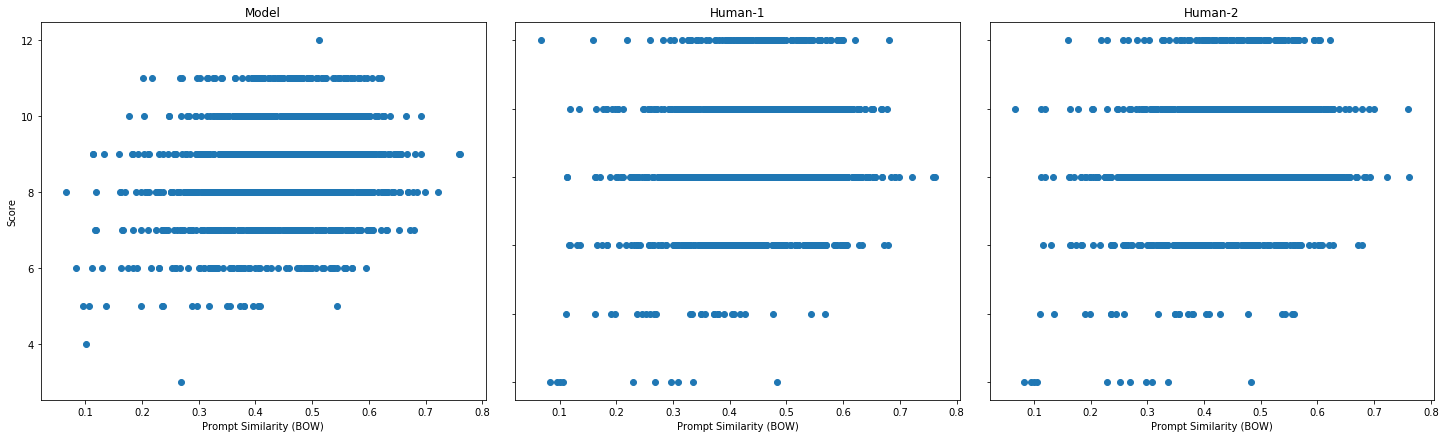

In [43]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(bow_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (BOW))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(bow_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(bow_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(bow_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (BOW)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('bow_similarity.png', bbox_inches="tight")

### 12. Language Error

In [44]:
lang_error = x[:,11]
lang_error

array([0.00784519, 0.01037613, 0.00831202, ..., 0.00955224, 0.        ,
       0.01748252])

Pearson's correlation Human-1: -0.272 (Language Error)
Pearson's correlation Human-2: -0.252 (Language Error)
Pearson's correlation Model: -0.307 (Language Error)


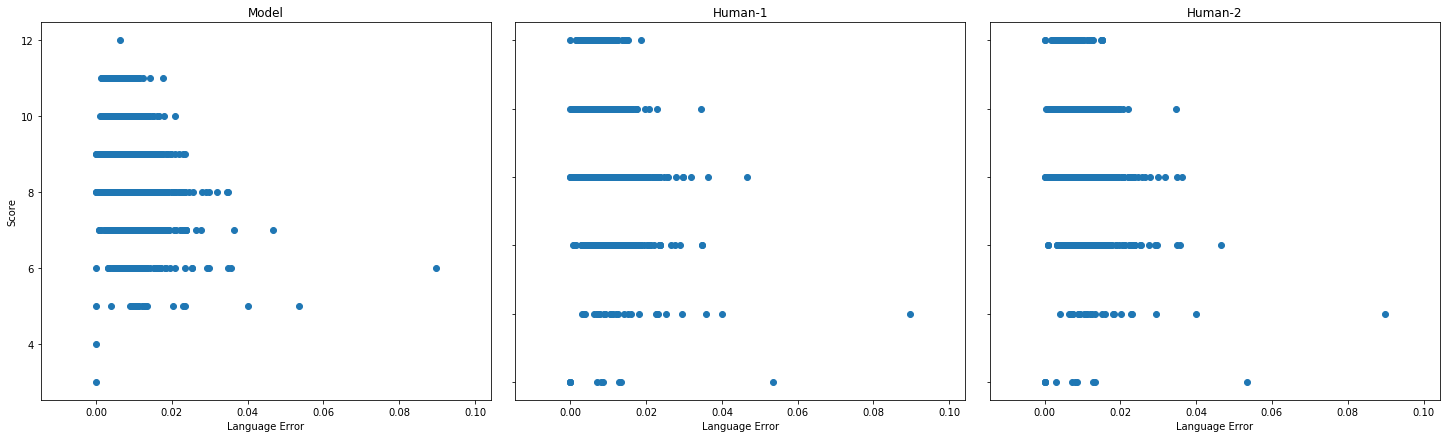

In [45]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(lang_error, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, model_score)
print('Pearson\'s correlation Model: %.3f (Language Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(lang_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(lang_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(lang_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Language Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('lang_error.png', bbox_inches="tight")